## Unit 3
#### О вкусной и здоровой пище 

### import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

from collections import Counter        
        
# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv
/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
16405,id_5481,Madrid,NaN,5484.0,NaN,8.0,"[[], []]",/Restaurant_Review-g187514-d7238261-Reviews-Ga...,d7238261,1,4.0
35804,id_1498,Edinburgh,"['Cafe', 'Vegetarian Friendly']",1501.0,NaN,17.0,"[['A nice add to the neighbourhood', 'Quick lu...",/Restaurant_Review-g186525-d12788232-Reviews-T...,d12788232,1,3.5
14525,id_4399,Berlin,NaN,4401.0,NaN,4.0,"[['Excellent Curry Wurst'], ['05/25/2012']]",/Restaurant_Review-g187323-d1341444-Reviews-Im...,d1341444,1,4.5
7546,id_7546,London,"['Contemporary', 'European', 'British', 'Veget...",2698.0,$$ - $$$,57.0,"[['Tasty food', 'Three words - Orange Espresso...",/Restaurant_Review-g186338-d12778556-Reviews-M...,d12778556,0,0.0
19387,id_1841,Lyon,['Chinese'],1842.0,$$ - $$$,15.0,"[['Decent food and service', 'Nice food and ex...",/Restaurant_Review-g187265-d5002439-Reviews-No...,d5002439,1,4.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

## Обработка Number of Reviews

In [15]:
# пустые значения - 25%, выдклю из них отдельный признак
data['number_of_reviews_na'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [16]:
# выделю медиану и среднее количество отзывов по городу
data = data.assign(city_mean_reviews = data.groupby('City')['Number of Reviews'].transform(np.mean))
data = data.assign(city_median_reviews = data.groupby('City')['Number of Reviews'].transform(np.median))

In [17]:
# заполню пустые значения медианой по городу 
data['Number of Reviews'].fillna(data.city_median_reviews, inplace = True)

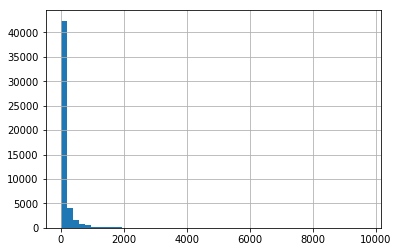

In [18]:
data['Number of Reviews'].hist(bins=50)

## Обработка Price Range

In [19]:
# 32639 пустых значений, 35%

In [20]:
data['Price Range'].fillna('0', inplace=True)

In [21]:
# для создания dummy переменных
data['Price Range'] = data['Price Range'].replace('$', 'low_price') 
data['Price Range'] = data['Price Range'].replace('$$ - $$$', 'medium_price') 
data['Price Range'] = data['Price Range'].replace('$$$$', 'high_price') 
data['Price Range'] = data['Price Range'].replace('0', 'no_price') 

In [22]:
price_dummies = pd.get_dummies(data['Price Range'])
data = pd.concat([data, price_dummies], axis=1)  

In [23]:
# выделю медиану и средний рейтинг отзывов по городу
data = data.assign(city_mean_rating = data.groupby('City')['Rating'].transform(np.mean))
data = data.assign(city_median_rating = data.groupby('City')['Rating'].transform(np.median))

In [24]:
# пустые значения цены
data['price_range_na'] = 0
data.loc[data['Price Range'] == 'no_price', 'price_range_na'] = 1

In [25]:
# перевожу в категориальную переменную
data['Price Range'] = data['Price Range'].replace('low_price', 1) 
data['Price Range'] = data['Price Range'].replace('medium_price', 2) 
data['Price Range'] = data['Price Range'].replace('high_price', 3) 
data['Price Range'] = data['Price Range'].replace('no_price', 0) 

## Обработка Cuisine Style

In [26]:
# признак пустого значения, так как много пропусков - 23%
data['cuisine_style_na'] = pd.isnull(data['Cuisine Style']).astype('float64') 

# заполню их значением Other
data['Cuisine Style'] = data['Cuisine Style'].fillna("['Other']")

In [27]:
# обработка переменной
data['Cuisine Style'] = data['Cuisine Style'].str.findall(r"'(\b.*?\b)'") 

In [28]:
all_cuisine = data['Cuisine Style'].tolist()

def cuis_count(list_):
    l = []
    for ll in list_:
        if ll != 'Other':
            l.extend(ll)
    return l   

# количество вхождений
cuisine_counter = Counter(cuis_count(all_cuisine))

In [29]:
# популярные кухни
popular_cuisine = [x[0] for x in cuisine_counter.most_common()[:10]]
data['popular_cuisine'] = data['Cuisine Style'].apply(lambda x: 1 if len(set(x) & set(popular_cuisine))>0  else 0).astype('float64')

In [30]:
# редкие кухни
rare_cuisine = [x[0] for x in cuisine_counter.most_common()[-10:]]
data['rare_cuisine'] = data['Cuisine Style'].apply(lambda x: 1 if len(set(x) & set(rare_cuisine))>0  else 0).astype('float64')

In [31]:
# количество типов кухни в ресторане
data['cuisine_nmbr'] = data['Cuisine Style'].apply(lambda x: len(x)).astype('float64')

## Обработка Reviews

In [32]:
# есть пропуски, и есть значение [[], []], что есть пропуск
data['Reviews'] = data['Reviews'].fillna('[[], []]')

data['reviews_na'] = (data['Reviews']=='[[], []]').astype('float64')

In [33]:
# достану дату из ревью и создам новый столбец
data['date_of_review'] = data['Reviews'].str.findall('\d+/\d+/\d+')

In [34]:
# количество обзоров
data['reviews_number'] = data['date_of_review'].apply(lambda x: len(x))

# флаг, если нет обзоров
data['no_reviews'] = (data['reviews_number'] == 0).astype('float64')


## Обработка City

In [35]:
# нет пропусков, выделю все города в dummy переменные
city_dummies = pd.get_dummies(data['City'], dummy_na=True)
data = pd.concat([data, city_dummies], axis=1) 

In [36]:
# выделю топ 10 городов сверху и снизу
all_cities = data.City.value_counts().index
top_cities = list(all_cities)[:10]
small_cities = list(all_cities)[-10:]

In [37]:
# входит в топ городов
data['top_cities'] = 0
data.loc[data['City'].isin(top_cities), 'top_cities'] = 1

# входит в небольшие города
data['small_cities'] = 0
data.loc[data['City'].isin(top_cities), 'small_cities'] = 1

In [38]:
# выделю столицы
no_capital = ['Barcelona', 'Geneva', 'Krakow', 'Milan', 'Lyon', 'Zurich', 'Hamburg', 'Munich', 'Oporto' ]
data['capital'] = data['City'].apply(lambda x: 0 if x in no_capital else 1)
data['no_capital'] = data['City'].apply(lambda x: 1 if x in no_capital else 0)

## Обработка ID_TA

In [39]:
data['int_ID_TA'] = data['ID_TA'].apply(lambda x: int(x[1:]))

## EDA 


### Посмотрим распределение признака

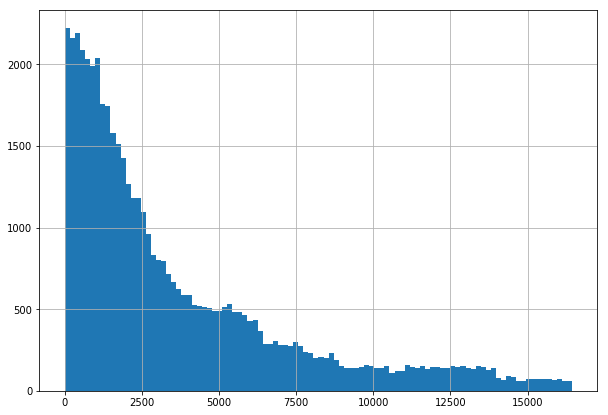

In [40]:
plt.rcParams['figure.figsize'] = (10,7)
data['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

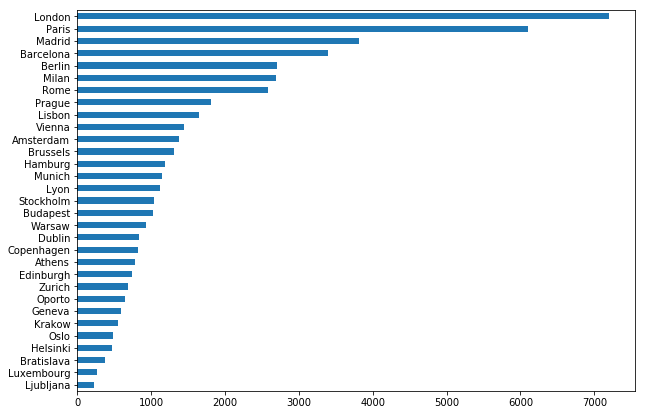

In [41]:
data['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

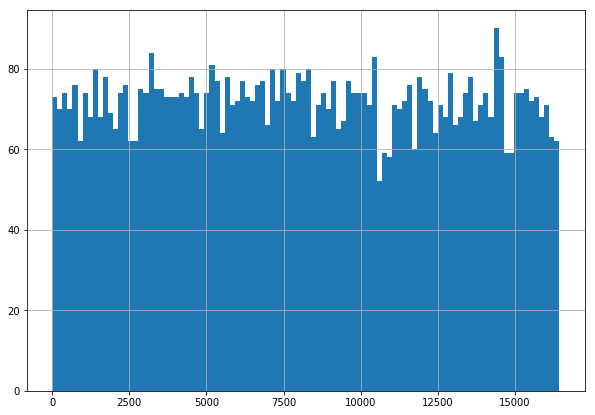

In [42]:
data['Ranking'][data['City'] =='London'].hist(bins=100)

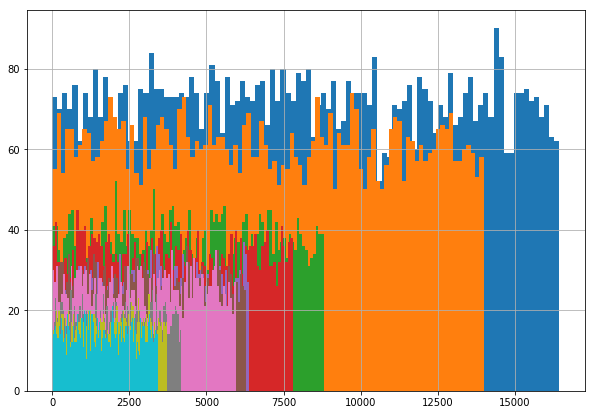

In [43]:
# посмотрим на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['Ranking'][data['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

In [44]:
# добавлю стандартное отклонение по Ranking
data['ranking_std'] = data['Ranking'].std

In [45]:
# средний Ranking по городам 
data = data.assign(city_mean_ranking = data.groupby('City')['Ranking'].transform(np.mean))

city_cnt_rest = data['City'].value_counts(ascending=False)
data['city_cnt_rest'] = data['City'].apply(lambda x: city_cnt_rest[x])

data['norm_ranking'] = (data['Ranking'] - data['city_mean_ranking']) / data['city_cnt_rest']

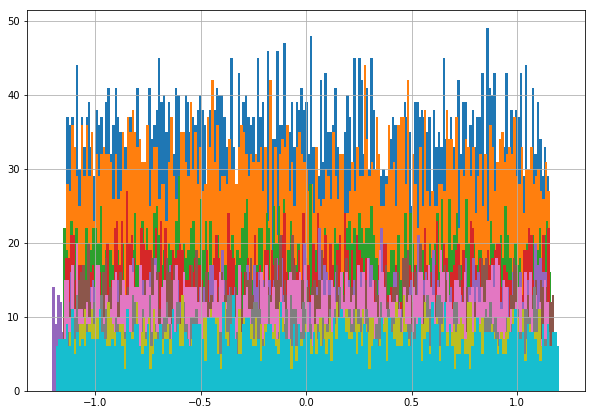

In [46]:
# посмотрю norm_ranking на топ 10 городов
for x in (data['City'].value_counts())[0:10].index:
    data['norm_ranking'][data['City'] == x].hist(bins=200)
plt.show()

### Посмотрим распределение целевой переменной

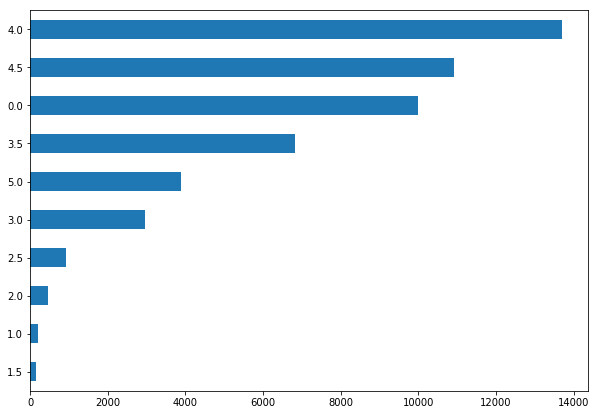

In [47]:
data['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

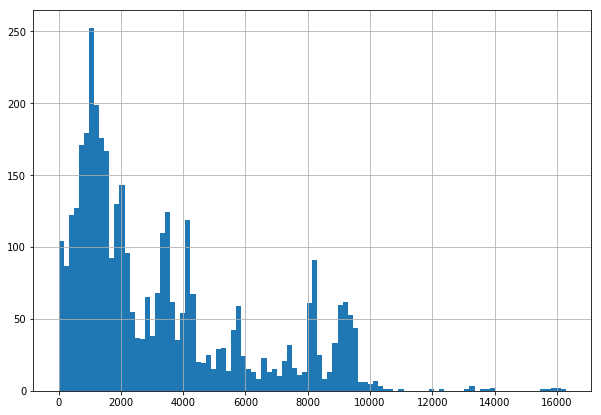

In [48]:
data['Ranking'][data['Rating'] == 5].hist(bins=100)

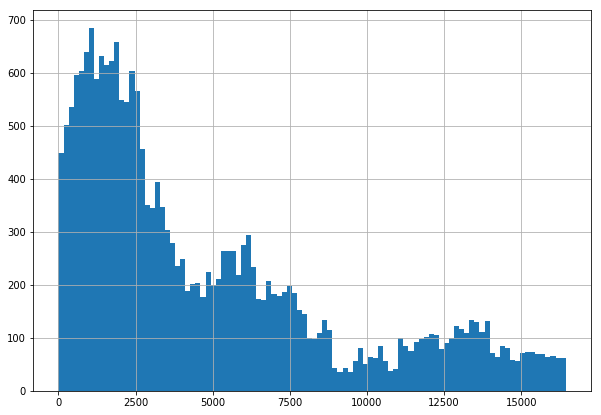

In [49]:
data['Ranking'][data['Rating'] < 4].hist(bins=100)

### Корреляция

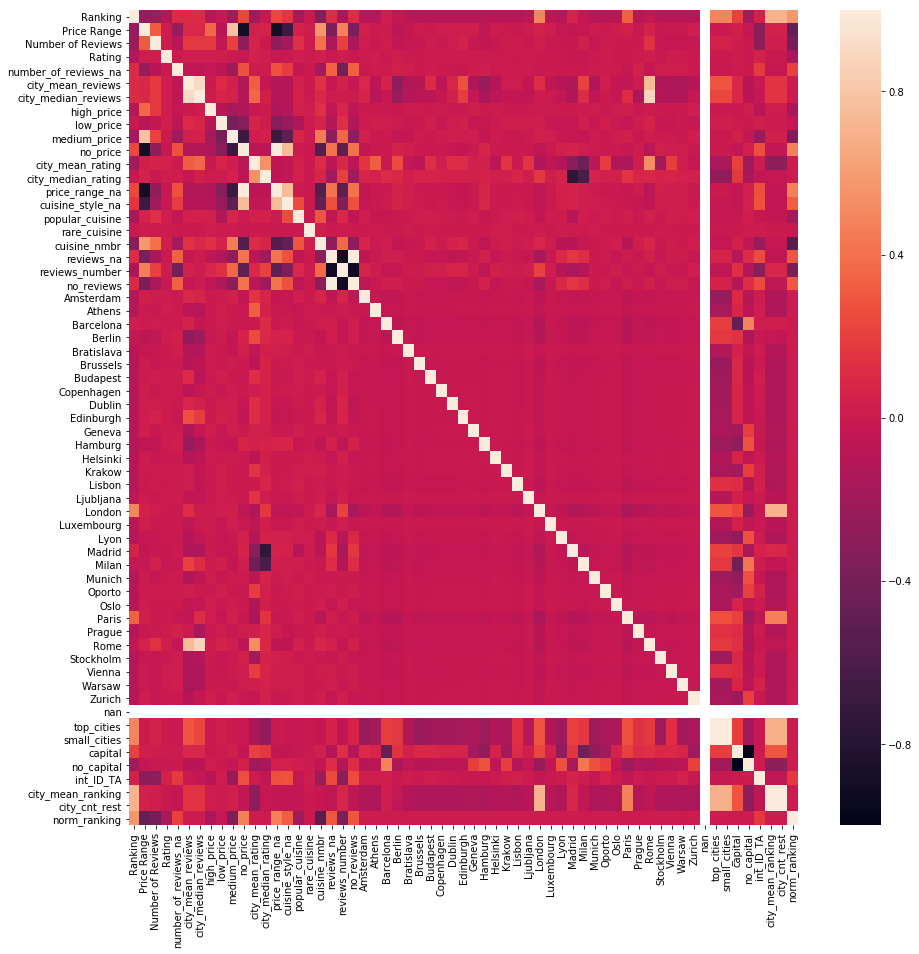

In [50]:
plt.rcParams['figure.figsize'] = (15,15)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

In [51]:
# корреляция между no_capital и capital, удаляю capital
data.drop(['capital'], axis = 1, inplace=True)

### Выделим тестовую часть

In [52]:
# удаление столбцов типа object
object_columns = [s for s in data.columns if data[s].dtypes == 'object']
data.drop(object_columns, axis = 1, inplace=True)

In [53]:
# Теперь выделим тестовую часть
train_data = data.query('sample == 1').drop(['sample'], axis=1)
test_data = data.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

In [54]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 60), (40000, 60), (40000, 59), (32000, 59), (8000, 59))

# Model 

In [55]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [56]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [57]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   10.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [58]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.199378125


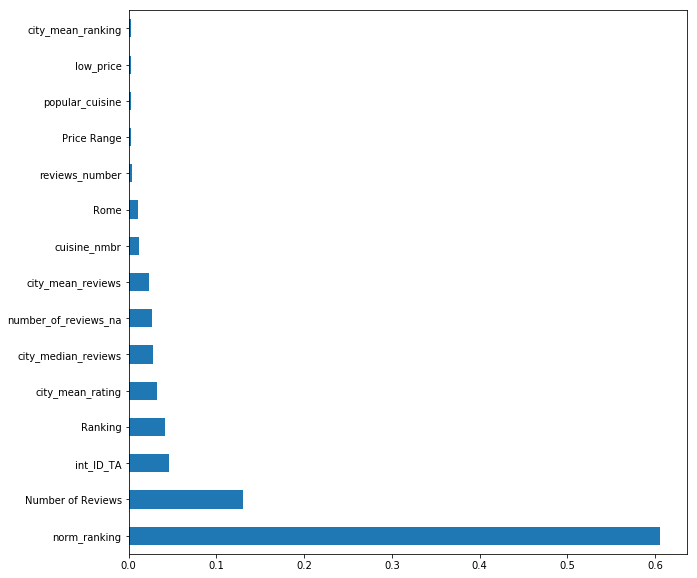

In [59]:
# важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [60]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,number_of_reviews_na,city_mean_reviews,city_median_reviews,high_price,low_price,medium_price,...,Warsaw,Zurich,NaN,top_cities,small_cities,no_capital,int_ID_TA,city_mean_ranking,city_cnt_rest,norm_ranking
7975,12829.0,1,9.0,0.0,0,137.968381,38.0,0,1,0,...,0,0,0,1,1,0,4431448,8169.707354,7193,0.647754
614,14487.0,2,82.0,0.0,0,137.968381,38.0,0,0,1,...,0,0,0,1,1,0,7315033,8169.707354,7193,0.878256
9031,1823.0,2,162.0,0.0,0,135.683096,35.0,0,0,1,...,0,0,0,1,1,1,997526,3879.422680,3395,-0.605721
1561,5093.0,0,4.0,0.0,0,168.298869,47.0,0,0,0,...,0,0,0,1,1,1,8339890,3106.027840,2694,0.737555
3503,1779.0,2,237.0,0.0,0,289.787107,119.0,0,0,1,...,0,0,0,1,1,0,2510729,2970.733102,2589,-0.460306
2513,182.0,2,373.0,0.0,0,168.298869,47.0,0,0,1,...,0,0,0,1,1,1,1319802,3106.027840,2694,-1.085385
3125,15405.0,2,73.0,0.0,0,137.968381,38.0,0,0,1,...,0,0,0,1,1,0,4292435,8169.707354,7193,1.005880
8402,5531.0,2,3.0,0.0,0,99.911888,27.0,0,0,1,...,0,0,0,1,1,0,11749071,4388.516391,3813,0.299629
6853,1119.0,3,202.0,0.0,0,289.787107,119.0,1,0,0,...,0,0,0,1,1,0,1180834,2970.733102,2589,-0.715231
972,7906.0,0,17.0,0.0,0,117.040915,44.0,0,0,0,...,0,0,0,1,1,0,11180599,6938.557138,6108,0.158389


In [61]:
test_data = test_data.drop(['Rating'], axis=1)

In [62]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [63]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [64]:
predict_submission

array([3.215, 4.135, 4.445, ..., 3.01 , 4.46 , 4.155])

In [65]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.215
1,id_1,4.135
2,id_2,4.445
3,id_3,4.400
4,id_4,4.485
5,id_5,4.515
6,id_6,2.235
7,id_7,2.900
8,id_8,4.025
9,id_9,4.595
